## Описание датасета

**Датасет:** House Prices - Advanced Regression Techniques (Kaggle)

**Предметная область:** Недвижимость, оценка стоимости жилья

**Источник данных:** Реальные данные о продажах домов

**Характер данных:** Реальные данные

**Задача анализа:** Предсказание конечной стоимости домов (SalePrice) на основе характеристик объекта

**Используемые атрибуты:**
- LotArea: Площадь участка (кв. футы) - числовой
- YearBuilt: Год постройки - числовой  
- TotalBsmtSF: Площадь подвала (кв. футы) - числовой
- GrLivArea: Жилая площадь выше уровня земли (кв. футы) - числовой
- BedroomAbvGr: Количество спален выше уровня земли - числовой
- SalePrice: Цена продажи ($) - числовой (целевая переменная)

In [ ]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('C:/Users/User/.ipynb_checkpoints/train.csv')

: 

In [8]:
#предпросмотр
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер данных: (1460, 81)

Первые 5 строк:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
# основные числ. атрибуты для анализа
numerical_features = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'SalePrice']
df_numerical = df[numerical_features]
print("Статистическое описание:")
df_numerical.describe()
#avg и СКО
print("\n" + "="*50)
print("СРЕДНИЕ ЗНАЧЕНИЯ И СТАНДАРТНЫЕ ОТКЛОНЕНИЯ:")
print("="*50)
for col in numerical_features:
    mean_val = df_numerical[col].mean()
    std_val = df_numerical[col].std()
    print(f"{col:15} | Среднее: {mean_val:10.2f} | СКО: {std_val:10.2f} | Отн. вар: {(std_val/mean_val*100):5.1f}%")

Статистическое описание:

СРЕДНИЕ ЗНАЧЕНИЯ И СТАНДАРТНЫЕ ОТКЛОНЕНИЯ:
LotArea         | Среднее:   10516.83 | СКО:    9981.26 | Отн. вар:  94.9%
YearBuilt       | Среднее:    1971.27 | СКО:      30.20 | Отн. вар:   1.5%
TotalBsmtSF     | Среднее:    1057.43 | СКО:     438.71 | Отн. вар:  41.5%
GrLivArea       | Среднее:    1515.46 | СКО:     525.48 | Отн. вар:  34.7%
BedroomAbvGr    | Среднее:       2.87 | СКО:       0.82 | Отн. вар:  28.5%
SalePrice       | Среднее:  180921.20 | СКО:   79442.50 | Отн. вар:  43.9%


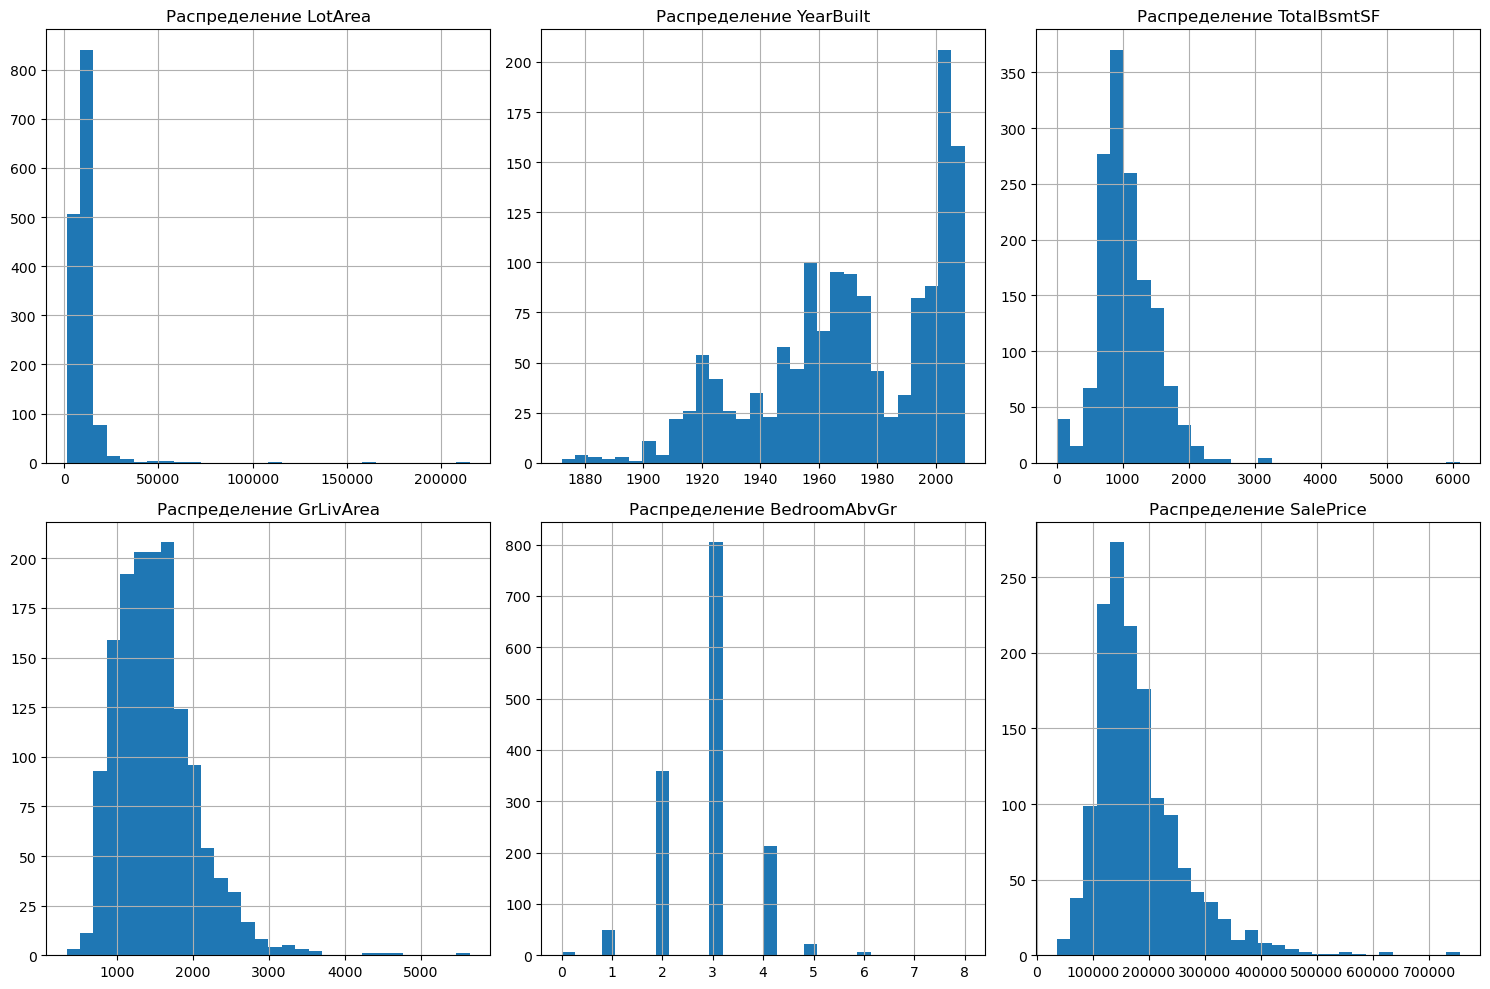

In [10]:
#гистограмма
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numerical_features):
    ax = axes[i//3, i%3]
    df_numerical[col].hist(bins=30, ax=ax)
    ax.set_title(f'Распределение {col}')
plt.tight_layout()
plt.show()

In [14]:
#анализ пропущенных значений
print("Детальный анализ пропущенных значений:")
for col in numerical_features:
    missing_count = df_numerical[col].isnull().sum()
    missing_percent = (missing_count / len(df_numerical)) * 100
    print(f"{col}: {missing_count} пропусков ({missing_percent:.2f}%)")
print("\nПредложения по обработке пропусков:")
for col in numerical_features:
    if df_numerical[col].isnull().sum() > 0:
        print(f"{col}: предлагаю заполнить медианой ({df_numerical[col].median()})")
    else:
        print(f"{col}: пропусков нет")

Детальный анализ пропущенных значений:
LotArea: 0 пропусков (0.00%)
YearBuilt: 0 пропусков (0.00%)
TotalBsmtSF: 0 пропусков (0.00%)
GrLivArea: 0 пропусков (0.00%)
BedroomAbvGr: 0 пропусков (0.00%)
SalePrice: 0 пропусков (0.00%)

Предложения по обработке пропусков:
LotArea: пропусков нет
YearBuilt: пропусков нет
TotalBsmtSF: пропусков нет
GrLivArea: пропусков нет
BedroomAbvGr: пропусков нет
SalePrice: пропусков нет


Выбросы в LotArea: 69
Выбросы в YearBuilt: 7
Выбросы в TotalBsmtSF: 61
Выбросы в GrLivArea: 31
Выбросы в BedroomAbvGr: 35
Выбросы в SalePrice: 61


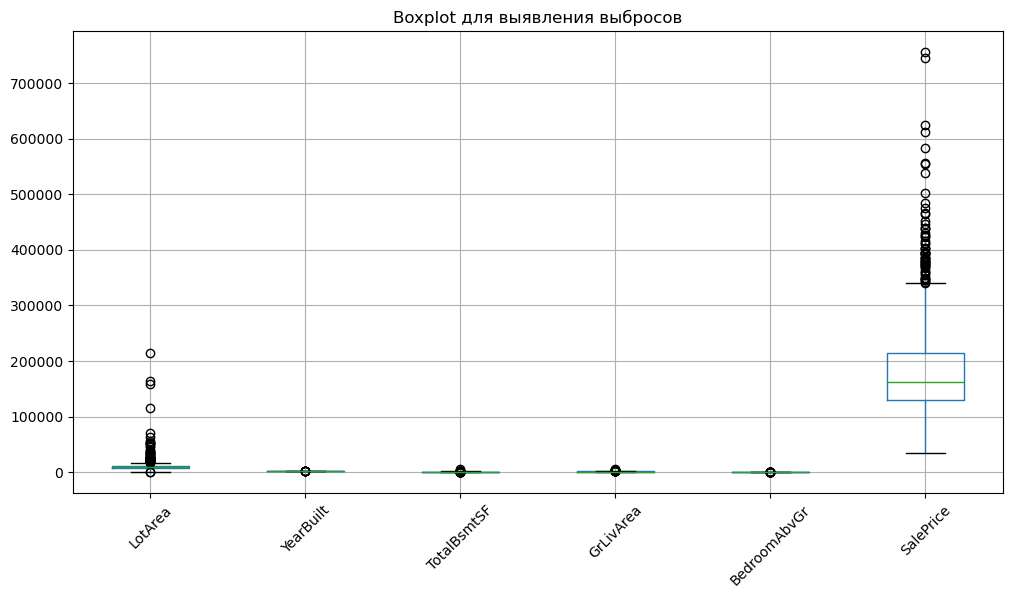

In [12]:
# Поиск выбросов через IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

outliers_sum = pd.Series([0]*len(df_numerical.columns), index=df_numerical.columns)

for col in numerical_features:
    outliers = find_outliers_iqr(df_numerical[col])
    outliers_sum[col] = outliers.sum()
    print(f"Выбросы в {col}: {outliers.sum()}")
plt.figure(figsize=(12, 6))
df_numerical.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot для выявления выбросов")
plt.show()

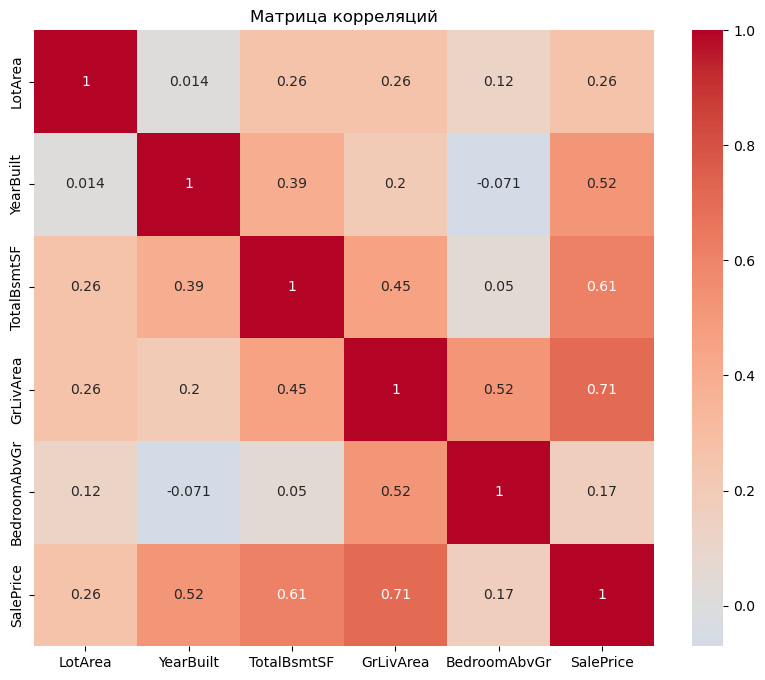

Высококоррелированные атрибуты:
             TotalBsmtSF  GrLivArea  SalePrice
TotalBsmtSF          NaN        NaN   0.613581
GrLivArea            NaN        NaN   0.708624
SalePrice       0.613581   0.708624        NaN

Низкокоррелированные атрибуты:
               LotArea  YearBuilt  TotalBsmtSF  GrLivArea  BedroomAbvGr  \
LotArea            NaN   0.014228     0.260833   0.263116      0.119690   
YearBuilt     0.014228        NaN          NaN   0.199010     -0.070651   
TotalBsmtSF   0.260833        NaN          NaN        NaN      0.050450   
GrLivArea     0.263116   0.199010          NaN        NaN           NaN   
BedroomAbvGr  0.119690  -0.070651     0.050450        NaN           NaN   
SalePrice     0.263843        NaN          NaN        NaN      0.168213   

              SalePrice  
LotArea        0.263843  
YearBuilt           NaN  
TotalBsmtSF         NaN  
GrLivArea           NaN  
BedroomAbvGr   0.168213  
SalePrice           NaN  


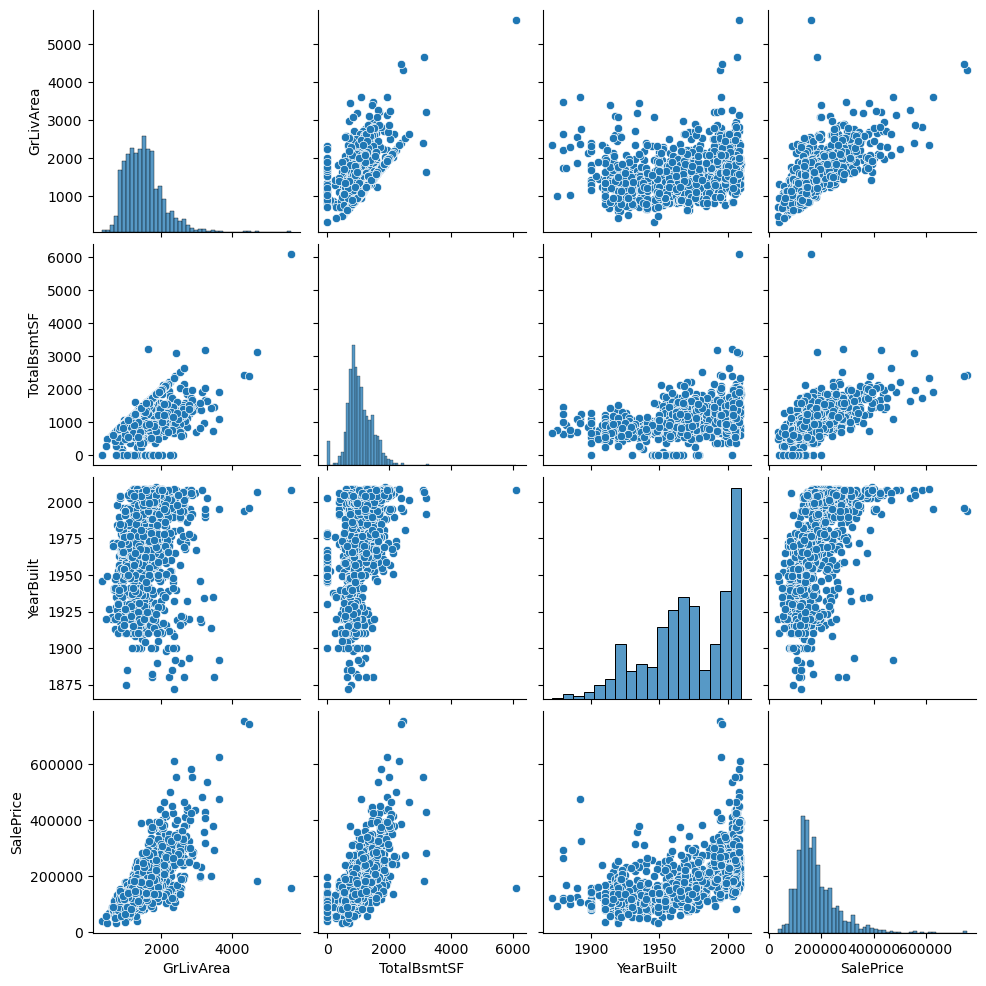

In [22]:
# Матрица корреляций
plt.figure(figsize=(10, 8))
corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Матрица корреляций")
plt.show()

# Анализ высоких корреляций
high_corr = corr_matrix[(corr_matrix > 0.6) & (corr_matrix < 1.0)]
print("Высококоррелированные атрибуты:")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

# Низкие корреляции
low_corr = corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3) & (corr_matrix != 0)]
print("\nНизкокоррелированные атрибуты:")
print(low_corr.dropna(how='all').dropna(axis=1, how='all'))

# Матрица scatter plots
sns.pairplot(df_numerical[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']])
plt.show()

In [17]:
# Детальная статистика по каждому признаку
print("Детальная статистика по каждому признаку:")
stats_details = []
for col in numerical_features:
    stats_details.append({
        'Признак': col,
        'Среднее': df_numerical[col].mean(),
        'Стандартное отклонение': df_numerical[col].std(),
        'Медиана': df_numerical[col].median(),
        'Минимум': df_numerical[col].min(),
        'Максимум': df_numerical[col].max(),
        'Пропуски': df_numerical[col].isnull().sum()
    })

stats_df = pd.DataFrame(stats_details)
print(stats_df.round(2))

Детальная статистика по каждому признаку:
        Признак    Среднее  Стандартное отклонение   Медиана  Минимум  \
0       LotArea   10516.83                 9981.26    9478.5     1300   
1     YearBuilt    1971.27                   30.20    1973.0     1872   
2   TotalBsmtSF    1057.43                  438.71     991.5        0   
3     GrLivArea    1515.46                  525.48    1464.0      334   
4  BedroomAbvGr       2.87                    0.82       3.0        0   
5     SalePrice  180921.20                79442.50  163000.0    34900   

   Максимум  Пропуски  
0    215245         0  
1      2010         0  
2      6110         0  
3      5642         0  
4         8         0  
5    755000         0  


In [18]:
# Проверка нормальности распределения
from scipy.stats import shapiro

print("\nПроверка нормальности распределения (тест Шапиро-Уилка):")
for col in numerical_features:
    stat, p_value = shapiro(df_numerical[col].dropna())
    normal = "нормальное" if p_value > 0.05 else "не нормальное"
    print(f"{col}: p-value = {p_value:.4f} ({normal} распределение)")


Проверка нормальности распределения (тест Шапиро-Уилка):
LotArea: p-value = 0.0000 (не нормальное распределение)
YearBuilt: p-value = 0.0000 (не нормальное распределение)
TotalBsmtSF: p-value = 0.0000 (не нормальное распределение)
GrLivArea: p-value = 0.0000 (не нормальное распределение)
BedroomAbvGr: p-value = 0.0000 (не нормальное распределение)
SalePrice: p-value = 0.0000 (не нормальное распределение)


## Выводы

1. **Качество данных:** В выбранных признаках минимальное количество пропусков, что упрощает предобработку.
2. **Выбросы:** Наибольшее количество выбросов наблюдается в LotArea и SalePrice.
3. **Корреляции:** 
   - GrLivArea и TotalBsmtSF сильно коррелируют с SalePrice
   - YearBuilt показывает умеренную корреляцию с ценой
   - BedroomAbvGr слабо коррелирует с ценой
4. **Распределения:** Большинство признаков имеют не нормальное распределение.
5. **Рекомендации:** Для дальнейшего анализа стоит рассмотреть логарифмическое преобразование признаков с skewed распределением.